In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("PrePlacement.csv")

In [5]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [6]:
import seaborn as sns    #visual representation

C:\Temp\ipykernel_14500\2212549341.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ssc_p"])


<Axes: xlabel='ssc_p', ylabel='Density'>

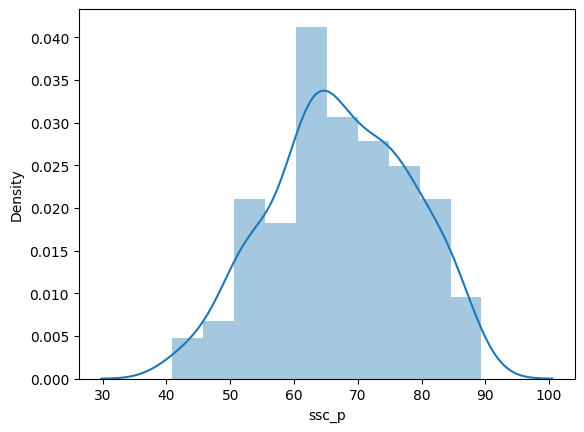

In [8]:
sns.distplot(dataset["ssc_p"])
#distribution plt

In [16]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    # kernel density=true --curve varum, kde_kws--to customize the appearance of a KDE plot in a distribution plot
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green') 
    pyplot.axvline(startrange,color='Red')  #axvline==axis la vertical line, denoting the color
    pyplot.axvline(endrange,color='Red')
    #generate a sample
    sample=dataset
    #calculate parameters
    sample_mean=sample.mean() #finds mean value
    sample_std=sample.std() #finds standard deviation
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean,sample_std))
    #define the distribution
    dist=norm(sample_mean,sample_std) 

    #sample probabilities for a range of outcomes
    values=[value for value in range(startrange, endrange)]   #single line la list ah convert agum
    probabilities=[dist.pdf(value) for value in values]   #pdf--probability density function
    prob=sum(probabilities)  # whole probability
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

In [21]:
#normal traditional method for creating list
#values=[]
#for value in range(40,50):
#    values.append(value)

In [22]:
#values

[40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

Mean=67.303, Standard Deviation=10.827
The area between range(50,70):0.5304184324400784


C:\Temp\ipykernel_14500\2622734221.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


0.5304184324400784

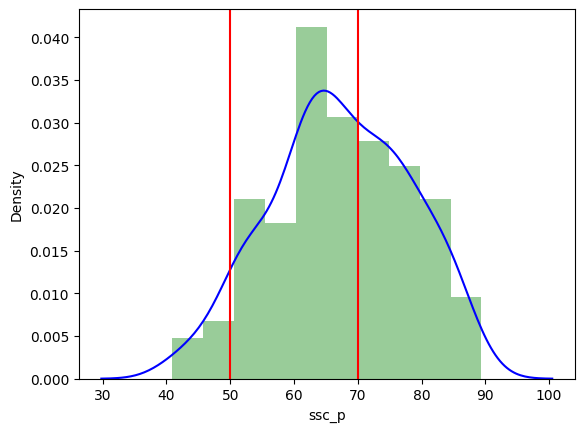

In [19]:
get_pdf_probability(dataset["ssc_p"],50,70)  #mention columnname or it shows error

In [24]:
#!pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 670.4 kB/s eta 0:00:14
   -- ------------------------------------- 0.5/9.9 MB 670.4 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/9.9 MB 745.8 kB/s eta 0:00:13
   ---- ----------------------------------- 1.0/9.9 MB 762.0 kB/s eta 0:00:12
   ----- ---------------------------------- 1.3/9.9 MB 871.6 kB/s eta 0:00:10
   ------- -------------------------------- 1.8/9.9 MB 1.1 MB/s eta 0:00:08
   -------- ------------------------------- 2.1/9.9 MB 1.1 MB/s eta 0:00:07
   --------- ------------------------------ 2.4/9.9 MB 1.1 MB/s eta 0:00:07
   ----------- ---------------------------- 2.9/9.9 MB 1.2 MB/s eta 0:00:06
   ----------- ---------------

In [29]:
#cumulative density function
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['ssc_p'])
ecdf(50)

0.05581395348837209

In [32]:
#convert to standard normal distribution
def stdNBgraph(dataset):  #input dataset
    import seaborn as sns
    mean=dataset.mean() #find mean and std to convert any dataset to SND
    std=dataset.std()
    values=[i for i in dataset]  #create list 
    z_score=[((j-mean)/std) for j in values]  #substitute the list values in z_score formula using inliner
    sns.distplot(z_score, kde=True) #distribution plot
    sum(z_score)/len(z_score)
    #z_score.std()

C:\Temp\ipykernel_14500\2455869836.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score, kde=True) #distribution plot


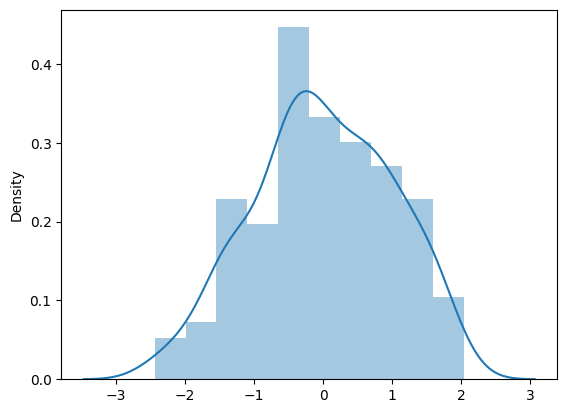

In [33]:
stdNBgraph(dataset['ssc_p'])